# CÂU 1

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [56]:
cols = [
    'Pregnancies','Glucose','BloodPressure',
    'SkinThickness','Insulin','BMI',
    'DiabetesPedigreeFunction','Age','Outcome']

In [57]:
import pandas as pd

df = pd.read_csv("diabetes.csv", usecols= cols)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


nhìn sơ qua bảng, kết quả outcome = 1 là bệnh, outcome = 0 là ko bệnh

In [58]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


kiểm tra thiếu dữ liệu


In [59]:
df.columns[df.isna().sum() > 1]

Index([], dtype='object')

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error



gọi tên các features


In [70]:
print("Keys: ", df.columns)



Keys:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


xem info các cột

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [73]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


kiểm tra giữ liệu bị khuyết


In [75]:
df.isnull().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


số lượng nhãn 

In [76]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

không bị khuyết dữ liệu, nhưng có thể giá trị thiếu bằng

In [82]:


df_reset = df.copy(deep = True)
df_reset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(df_reset)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

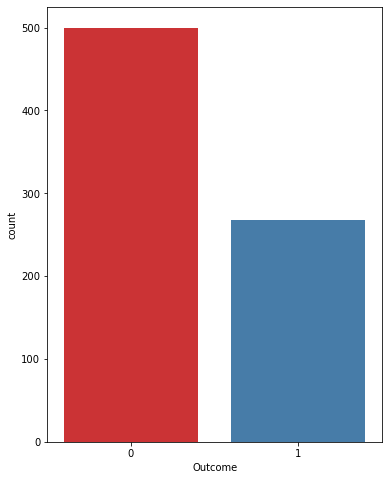

In [107]:
df.value_counts()/len(df)

f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x= 'Outcome', data= df  , palette="Set1")
plt.show()

In [ ]:
df['Outcome'].value_counts()/len(df)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

35% người bị bệnh 65% không

Normalize

In [108]:
X = df.drop(['Outcome'], axis= 1)
Y = df['Outcome']

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)


In [117]:
from sklearn import preprocessing

X_test_nor = preprocessing.Normalizer().fit(X)
X_test_nor = X_test_nor.transform(X)
X_test_nor

array([[0.03355237, 0.82762513, 0.40262844, ..., 0.18789327, 0.00350622,
        0.27960308],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.22407851, 0.00295683,
        0.26114412],
       [0.04039768, 0.92409698, 0.32318146, ..., 0.11765825, 0.00339341,
        0.16159073],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.14103664, 0.00131885,
        0.16149234],
       [0.00665306, 0.83828547, 0.39918356, ..., 0.20025708, 0.00232192,
        0.31269379],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.24060198, 0.00249308,
        0.18203439]])

In [112]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

CÂU 2

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,)

In [114]:
rf = RandomForestClassifier(n_estimators= 600, random_state=42, max_depth= 2)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
r2 = round(rf.score(X_train, y_train), 2)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print('RMSE: {}'.format(rmse))
print('R2 score: {}'.format(r2))
print('Accuracy:', accuracy_score(y_test,y_pred_rf))
print('Precision score:', precision_score(y_test, y_pred_rf))
print('recall score: '), recall_score(y_test, y_pred_rf)
print('F1 score: ', f1_score(y_test,y_pred_rf))


RMSE: 0.4558423058385518
R2 score: 0.77
Accuracy: 0.7922077922077922
Precision score: 0.8285714285714286
recall score: 
F1 score:  0.6444444444444444


In [115]:
auc_score = roc_auc_score(y_test, y_pred_rf)
print(auc_score)


0.7333333333333334
